<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11039 entries, 0 to 11038
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       11039 non-null  object 
 1   Country Code  11039 non-null  object 
 2   Year          11039 non-null  int64  
 3   Inflation     11039 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 345.1+ KB
None
               Year     Inflation
count  11039.000000  11039.000000
mean    1997.128725     19.825504
std       16.961565    288.054102
min     1960.000000    -17.640424
25%     1984.000000      2.409180
50%     1999.000000      4.944324
75%     2011.000000      9.702161
max     2023.000000  23773.131774


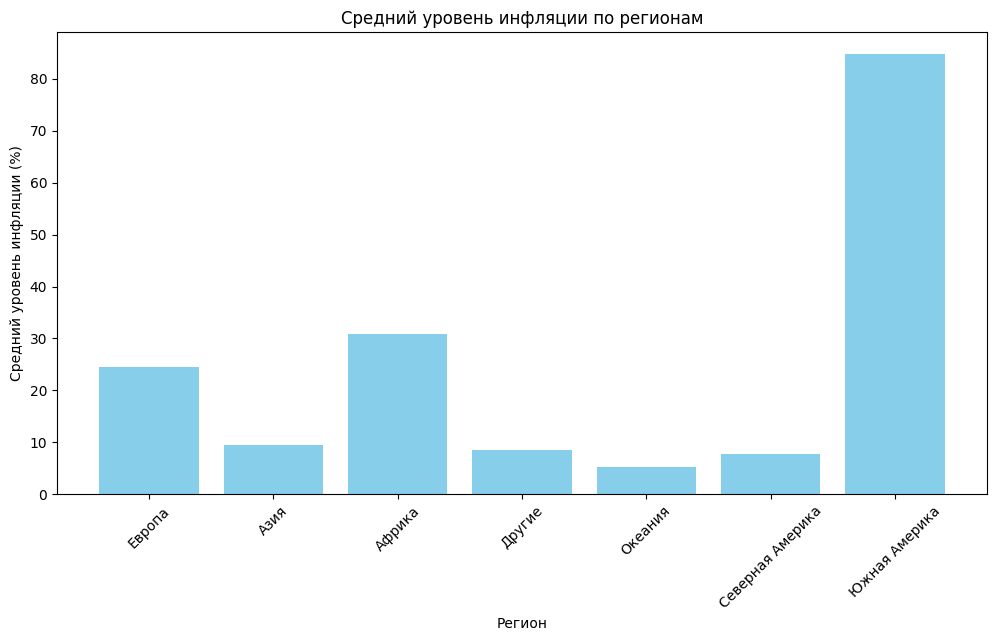

Обработка стран: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 261.25it/s]


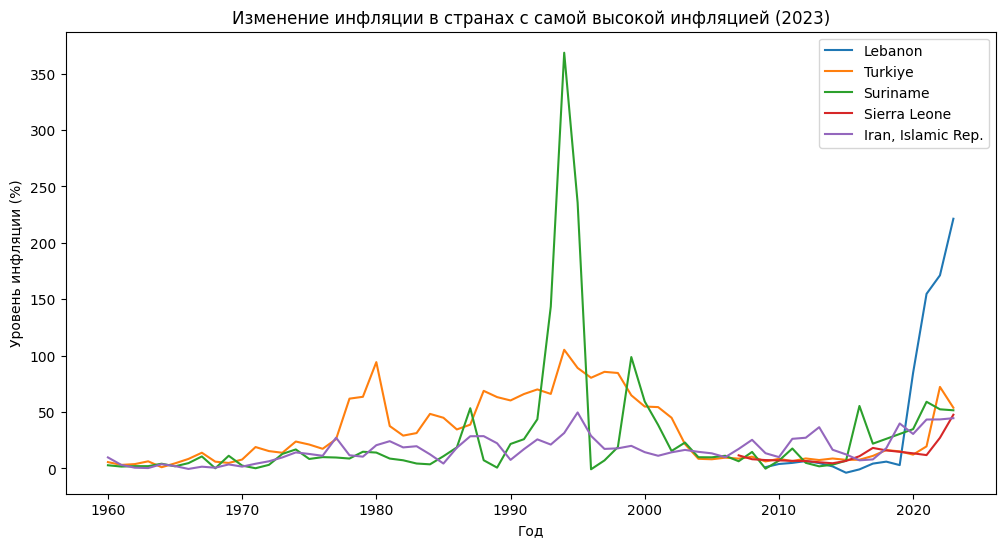

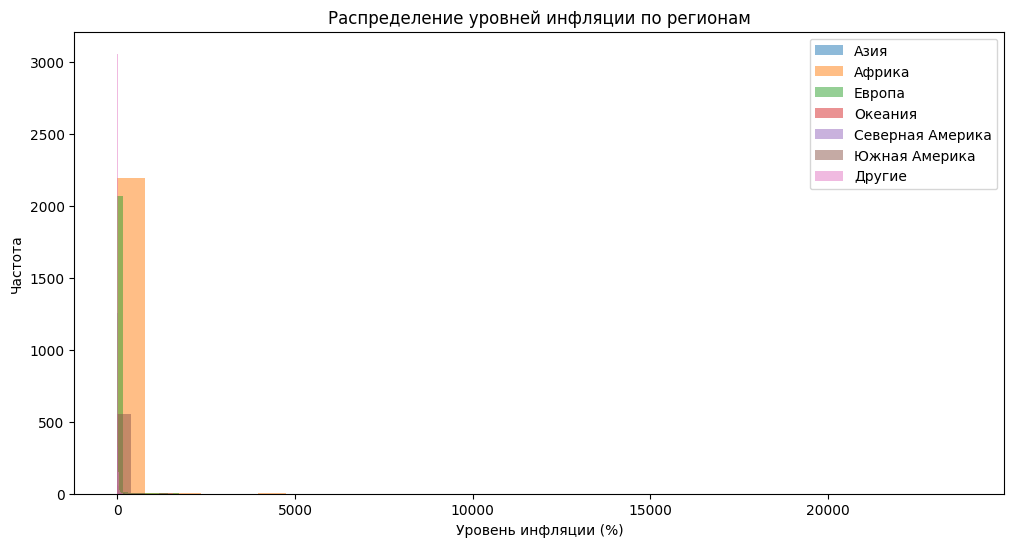

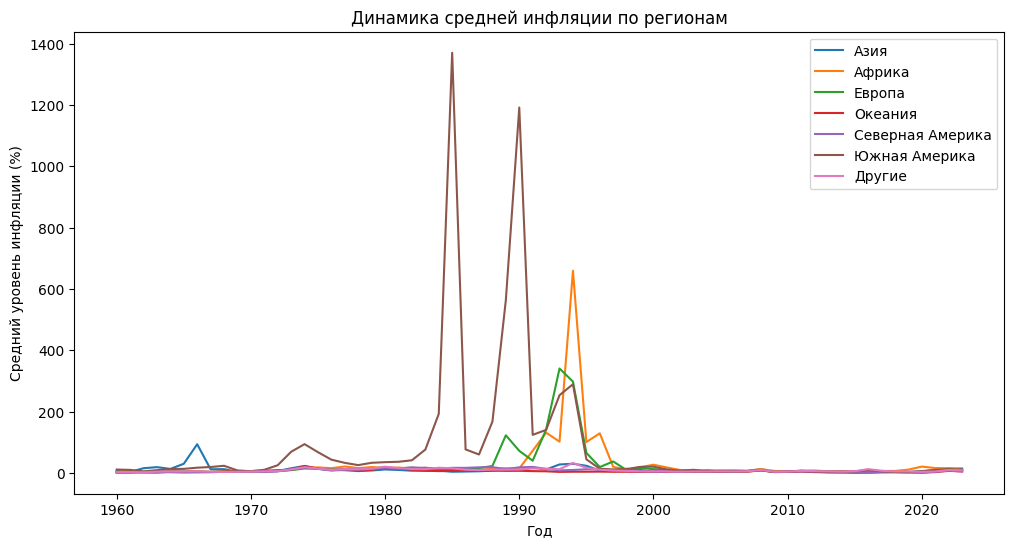

In [15]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
print(df.info())
print(df.describe())

region_mapping = {
    "Северная Америка": ["United States", "Canada", "Mexico", "Belize", "Costa Rica", "Cuba", "Dominican Republic", 
                        "El Salvador", "Guatemala", "Honduras", "Jamaica", "Nicaragua", "Panama", "Puerto Rico", 
                        "Trinidad and Tobago", "Bermuda", "Greenland", "Saint Pierre and Miquelon", "Bahamas", "Bahamas, The"],
    "Eвропа": ["Germany", "France", "United Kingdom", "Italy", "Spain", "Netherlands", "Belgium", "Sweden", 
                "Switzerland", "Poland", "Austria", "Norway", "Denmark", "Finland", "Ireland", "Portugal", 
                "Greece", "Czech Republic", "Hungary", "Slovakia", "Ukraine", "Romania", "Bulgaria", "Serbia", 
                "Croatia", "Slovenia", "Lithuania", "Latvia", "Estonia", "Luxembourg", "Iceland", "Malta", 
                "Andorra", "Belarus", "Monaco", "Liechtenstein", "Kosovo", "Faroe Islands", "Isle of Man", 
                "Gibraltar", "Channel Islands", "Albania", "Armenia", "Azerbaijan", "Bosnia and Herzegovina", 
                "Cyprus", "Czechia", "Estonia", "Georgia", "Kazakhstan", "Kyrgyz Republic", "Moldova", 
                "Montenegro", "North Macedonia", "Russian Federation", "Serbia", "Tajikistan", "Turkmenistan", 
                "Ukraine", "Uzbekistan"],
    "Азия": ["China", "India", "Japan", "South Korea", "Indonesia", "Vietnam", "Turkey", "Iran", "Thailand", 
              "Saudi Arabia", "Pakistan", "Malaysia", "Philippines", "United Arab Emirates", "Bangladesh", "Iraq", 
              "Kuwait", "Kazakhstan", "Uzbekistan", "Qatar", "Sri Lanka", "Oman", "Azerbaijan", "Lebanon", 
              "Jordan", "Myanmar", "Turkmenistan", "Bahrain", "Yemen", "Armenia", "Georgia", "Kyrgyzstan", 
              "Tajikistan", "Mongolia", "Nepal", "Bhutan", "Lao PDR", "Korea, Dem. People's Rep.", "Brunei Darussalam", 
              "Cambodia", "Maldives", "Timor-Leste", "Afghanistan"],
    "Африка": ["Nigeria", "South Africa", "Egypt", "Kenya", "Ethiopia", "Algeria", "Morocco", "Angola", "Ghana", 
                "Sudan", "Tunisia", "Cameroon", "Zimbabwe", "Senegal", "Zambia", "Uganda", "Mozambique", 
                "Botswana", "Namibia", "Madagascar", "Mali", "Niger", "Chad", "Burkina Faso", "Malawi", 
                "Cabo Verde", "Sao Tome and Principe", "Gambia", "Liberia", "Eritrea", "Djibouti", "Comoros", 
                "Equatorial Guinea", "Central African Republic", "Benin", "Guinea", "Togo", "Mauritania", 
                "Sierra Leone", "Seychelles", "Somalia", "Congo, Dem. Rep.", "Congo, Rep.", "Gabon", "Cote d'Ivoire", 
                "Burundi", "Rwanda", "Tanzania", "Lesotho", "Mauritius", "Swaziland", "Africa Eastern and Southern", 
                "Africa Western and Central", "Arab World"],
    "Южная Америка": ["Brazil", "Argentina", "Colombia", "Chile", "Peru", "Venezuela", "Ecuador", "Bolivia", 
                       "Paraguay", "Uruguay", "Guyana", "Suriname"],
    "Океания": ["Australia", "New Zealand", "Fiji", "Papua New Guinea", "Solomon Islands", "Vanuatu", "Samoa", 
                 "Tonga", "French Polynesia", "New Caledonia", "Micronesia, Fed. Sts.", "Cook Islands", "Niue", 
                 "Tokelau", "Pacific island small states", "Antigua and Barbuda", "Aruba", "Barbados", "Dominica", 
                 "Grenada", "Saint Lucia", "Saint Vincent and the Grenadines", "Curacao"]
}

def get_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return "Другие"

df["Region"] = df["Country"].apply(get_region)

region_inflation = df.groupby("Region")["Inflation"].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(region_inflation["Region"], region_inflation["Inflation"], color='skyblue')
plt.xlabel("Регион")
plt.ylabel("Средний уровень инфляции (%)")
plt.title("Средний уровень инфляции по регионам")
plt.xticks(rotation=45)
plt.show()

top_countries = df[df["Year"] == 2023].nlargest(5, "Inflation")["Country"].tolist()
df_top = df[df["Country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
for country in tqdm(top_countries, desc="Обработка стран"):
    country_data = df_top[df_top["Country"] == country]
    plt.plot(country_data["Year"], country_data["Inflation"], label=country)

plt.xlabel("Год")
plt.ylabel("Уровень инфляции (%)")
plt.title("Изменение инфляции в странах с самой высокой инфляцией (2023)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for region in df["Region"].unique():
    region_data = df[df["Region"] == region]
    plt.hist(region_data["Inflation"], bins=30, alpha=0.5, label=region)

plt.xlabel("Уровень инфляции (%)")
plt.ylabel("Частота")
plt.title("Распределение уровней инфляции по регионам")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for region in df["Region"].unique():
    region_data = df[df["Region"] == region]
    yearly_avg = region_data.groupby("Year")["Inflation"].mean().reset_index()
    plt.plot(yearly_avg["Year"], yearly_avg["Inflation"], label=region)

plt.xlabel("Год")
plt.ylabel("Средний уровень инфляции (%)")
plt.title("Динамика средней инфляции по регионам")
plt.legend()
plt.show()